In [1]:
#Import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read Dataset
data = pd.read_csv('data_kartu_kredit.csv')
data.shape

(284807, 31)

# From the table above shown data set credit card.
1. Column time is showing transactions time
2. Column V1-V28 (as V) is data that can be in the form of user age data, transactions, money etc.
   Column V data has been standardized centered on an average of 0
3. Column Amount is amount of transactions in dollars
4. Column Class is transaction fraud prediction data(0 = honest, 1 = fraud)

The amount data in the table is still in dollars, not the same scale as the data in other columns. therefore, it is necessary to standardize the data

In [3]:
#Standardize Column Amount
from sklearn.preprocessing import StandardScaler
data['standar'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [4]:
#Define dependent variable (y) and independent variable (X)
y = np.array(data.iloc[:,-2])
#Drop unnecessary data (data is not standardized)
X = np.array(data.drop(['Time', 'Amount', 'Class'], axis=1))

In [5]:
#Split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 111)

In [6]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,
                                                            test_size = 0.2,
                                                            random_state = 111)

In [7]:
#Design ANN model
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [8]:
classifier = Sequential()
classifier.add(Dense(units = 16, input_dim = 29, activation = 'relu'))
classifier.add(Dense(units = 24, activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units = 20, activation = 'relu'))
classifier.add(Dense(units = 24, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics =['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [9]:
#ANN model visualization
from keras.utils.vis_utils import plot_model
plot_model(classifier, to_file = 'Model ANN.png', show_shapes = True,
           show_layer_names = False)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [10]:
#Training ANN model
run_model = classifier.fit(X_train, y_train,
                           batch_size = 32, epochs = 5, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/5
5697/5697 [==============================] - 10s 2ms/step - loss: 0.0102 - accuracy: 0.9988 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 2/5
5697/5697 [==============================] - 10s 2ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 3/5
5697/5697 [==============================] - 10s 2ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 4/5
5697/5697 [==============================] - 9s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 5/5
5697/5697 [==============================] - 10s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993


In [11]:
#View saved parameters
print(run_model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


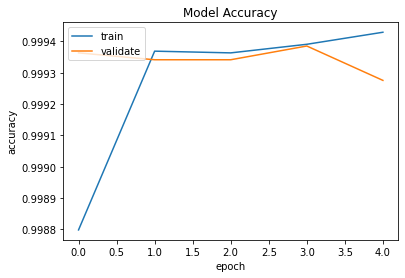

In [12]:
#Plot accuracy training and validation sets
plt.plot(run_model.history['accuracy'])
plt.plot(run_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc = 'upper left')
plt.show()

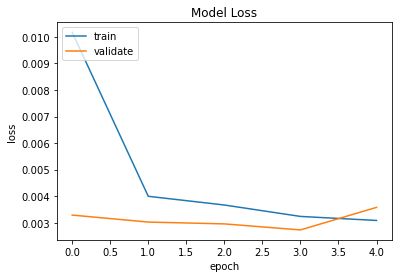

In [13]:
#Plot loss training dan validation set
plt.plot(run_model.history['loss'])
plt.plot(run_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc = 'upper left')
plt.show()

In [14]:
#Evaluate ANN model
evaluasi = classifier.evaluate(X_test, y_test)
print('Akurasi:{:.2f}'.format(evaluasi[1]*100))

1781/1781 [==============================] - 2s 960us/step - loss: 0.0034 - accuracy: 0.9992
Akurasi:99.92


In [15]:
#Predict test set
hasil_prediksi = classifier.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [16]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, hasil_prediksi)
cm_label = pd.DataFrame(cm, columns = np.unique(y_test), index = np.unique(y_test))
cm_label.index.name = 'Aktual'
cm_label.columns.name = 'Prediksi'


<AxesSubplot:xlabel='Prediksi', ylabel='Aktual'>

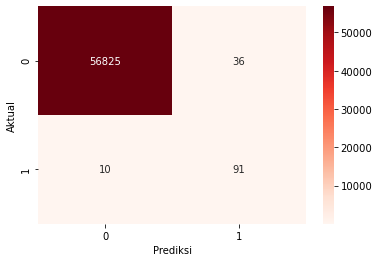

In [17]:
#Confusion matrix with seaborn
sns.heatmap(cm_label, annot=True, cmap = 'Reds', fmt = 'g')

In [18]:
#Classification report
from sklearn.metrics import classification_report
jumlah_kategori = 2
target_names = ['Class {}'.format(i) for i in range(jumlah_kategori)]
print(classification_report(y_test, hasil_prediksi, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     56861
     Class 1       0.72      0.90      0.80       101

    accuracy                           1.00     56962
   macro avg       0.86      0.95      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [19]:
#Undersampling method
index_fraud = np.array(data[data.Class==1].index)
n_fraud = len(index_fraud)
index_normal = np.array(data[data.Class==0].index)
index_data_normal = np.random.choice(index_normal, n_fraud, replace = False)
index_data_baru = np.concatenate([index_fraud, index_data_normal])
data_baru = data.iloc[index_data_baru, :]

In [20]:
#Classified dependent variable and idependent variable
y_baru = np.array(data_baru.iloc[:,-2])
X_baru = np.array(data_baru.drop(['Time', 'Amount', 'Class'], axis = 1))

In [21]:
#Split train and test set
X_train2, X_test_final, y_train2, y_test_final = train_test_split(X_baru, y_baru, test_size = 0.1,
                                                                 random_state = 111)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, y_train2, test_size = 0.1,
                                                                 random_state = 111)
X_train2, X_validate2, y_train2, y_validate2 = train_test_split(X_train2, y_train2, test_size = 0.2,
                                                                 random_state = 111)


In [22]:
#Design new ANN model
classifier2 = Sequential()
classifier2.add(Dense(units = 16, input_dim = 29, activation = 'relu'))
classifier2.add(Dense(units = 24, activation = 'relu'))
classifier2.add(Dropout(0.25))
classifier2.add(Dense(units = 20, activation = 'relu'))
classifier2.add(Dense(units = 24, activation = 'relu'))
classifier2.add(Dense(units = 1, activation = 'sigmoid'))
classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics =['accuracy'])
classifier2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
____________________________________________________

In [23]:
#Training new ANN model
run_model2 = classifier2.fit(X_train2, y_train2,
                           batch_size = 8, epochs = 5, verbose = 1, validation_data = (X_validate2, y_validate2))

Epoch 1/5
80/80 [==============================] - 0s 6ms/step - loss: 0.4835 - accuracy: 0.7201 - val_loss: 0.3704 - val_accuracy: 0.8687
Epoch 2/5
80/80 [==============================] - 0s 2ms/step - loss: 0.2885 - accuracy: 0.8962 - val_loss: 0.2560 - val_accuracy: 0.9250
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 0.2059 - accuracy: 0.9355 - val_loss: 0.2273 - val_accuracy: 0.9312
Epoch 4/5
80/80 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9403 - val_loss: 0.2256 - val_accuracy: 0.9250
Epoch 5/5
80/80 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9450 - val_loss: 0.2177 - val_accuracy: 0.9250


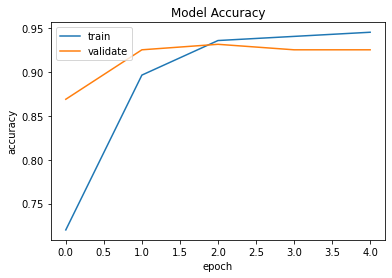

In [24]:
#Plot accuracy training and validation sets
plt.plot(run_model2.history['accuracy'])
plt.plot(run_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc = 'upper left')
plt.show()

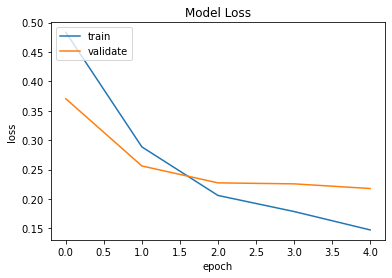

In [25]:
#Plot loss training dan validation set
plt.plot(run_model2.history['loss'])
plt.plot(run_model2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc = 'upper left')
plt.show()

In [26]:
#Evaluate new ANN model
evaluasi2 = classifier2.evaluate(X_test2, y_test2)
print('Akurasi:{:.2f}'.format(evaluasi2[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8764
Akurasi:87.64


In [27]:
#Predict test set
hasil_prediksi2 = classifier2.predict_classes(X_test2)

<AxesSubplot:xlabel='Prediksi', ylabel='Aktual'>

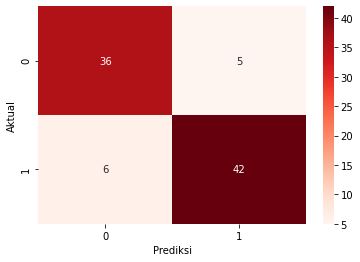

In [28]:
#confusion matrix

cm2 = confusion_matrix(y_test2, hasil_prediksi2)
cm_label2 = pd.DataFrame(cm2, columns = np.unique(y_test2), index = np.unique(y_test2))
cm_label2.index.name = 'Aktual'
cm_label2.columns.name = 'Prediksi'
#Confusion matrix with seaborn
sns.heatmap(cm_label2, annot=True, cmap = 'Reds', fmt = 'g')

In [29]:
#Classification report

print(classification_report(y_test2, hasil_prediksi2, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.86      0.88      0.87        41
     Class 1       0.89      0.88      0.88        48

    accuracy                           0.88        89
   macro avg       0.88      0.88      0.88        89
weighted avg       0.88      0.88      0.88        89



<AxesSubplot:xlabel='Prediksi', ylabel='Aktual'>

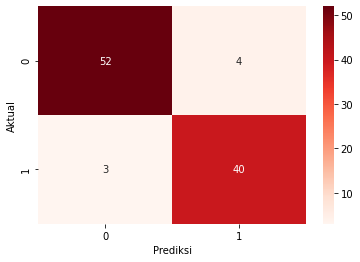

In [30]:
#Predict test set final
hasil_prediksi3 = classifier2.predict_classes(X_test_final)
cm3 = confusion_matrix(y_test_final, hasil_prediksi3)
cm_label3 = pd.DataFrame(cm3, columns = np.unique(y_test_final), index = np.unique(y_test_final))
cm_label3.index.name = 'Aktual'
cm_label3.columns.name = 'Prediksi'
#Confusion matrix with seaborn
sns.heatmap(cm_label3, annot=True, cmap = 'Reds', fmt = 'g')

In [31]:
#Classification report

print(classification_report(y_test_final, hasil_prediksi3, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.95      0.93      0.94        56
     Class 1       0.91      0.93      0.92        43

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99



In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_final, hasil_prediksi3)

0.9294019933554817